# Task2 by Anirban Bhowmick and Saif Hasan

Data Preprocessing

In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sb
sb.set(style = "whitegrid")
from scipy import stats

global df 
df= pd.read_csv('RM_measurement_-_Tabellenblatt1.csv')
df


,Sex,Wr.Hnd,NW.Hnd,W.Hand,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Male,20.4,20.3,Right,L on R,75,Left,Freq,Occas,184.0,Metric,23
1,Male,23,23,Left,L on R,72,L on R,None,Regul,175.0,Metric,34
2,Male,23,23,R,R on L,74,R,Some,Never,185.0,metric,22
3,Male,20.5,20,R,R on L,60,Neither,Some,Never,175.0,metric,24
4,Male,22,22,R,R on L,89,R on L,None,Never,174.0,Metric,27
5,Male,20,19.5,Right,R on L,80,Right,None,Never,177.0,Metric,31
6,Male,21,20.5,L,L on R,70,left,some\n,Never,173.0,metic,25
7,Male,20.5,20.5,R,L,72,Neither,Freq,Never,171.5,Metric,30
8,Female,15,15.5,R,R,86,L,None,Occas,158.0,Metric,23
9,Male,19.5,20.8,R,R,73,R,None,Never,181.0,Metric,23


# Data Cleansing

In [45]:
global new_df 
new_df= df.copy()

def setColValue(col,x,y): # x is initial coloumn value, y is the final coloumn value, col is the array of coloumn names
    new_df[col]= np.where(new_df[col] == x, y, new_df[col])

    
setColValue(['W.Hand','Fold','Clap'],'Right','R')
setColValue(['W.Hand','Fold','Clap'],'R on L','R')
setColValue(['W.Hand','Fold','Clap'],'Left','L')
setColValue(['W.Hand','Fold','Clap'],'left','L')
setColValue(['W.Hand','Fold','Clap'],'Right','R')
setColValue(['W.Hand','Fold','Clap'],'L on R','L')

new_df

,Sex,Wr.Hnd,NW.Hnd,W.Hand,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Male,20.4,20.3,R,L,75,L,Freq,Occas,184.0,Metric,23
1,Male,23,23,L,L,72,L,None,Regul,175.0,Metric,34
2,Male,23,23,R,R,74,R,Some,Never,185.0,metric,22
3,Male,20.5,20,R,R,60,Neither,Some,Never,175.0,metric,24
4,Male,22,22,R,R,89,R,None,Never,174.0,Metric,27
5,Male,20,19.5,R,R,80,R,None,Never,177.0,Metric,31
6,Male,21,20.5,L,L,70,L,some\n,Never,173.0,metic,25
7,Male,20.5,20.5,R,L,72,Neither,Freq,Never,171.5,Metric,30
8,Female,15,15.5,R,R,86,L,None,Occas,158.0,Metric,23
9,Male,19.5,20.8,R,R,73,R,None,Never,181.0,Metric,23


In [46]:
new_df = new_df.replace(new_df['Exer'][6], 'Some')

In [47]:

objHandMap={'L':0,'R':1,'Neither':2}
objExecMap={'None':0,'Some':1,'Freq':2}
objSmokeMap={'Never':0,'Occas':1,'Regul':2}

new_df['WHand_Col']= new_df['W.Hand'].map(objHandMap)
new_df['Fold_Col']= new_df['Fold'].map(objHandMap)
new_df['Clap_Col']= new_df['Clap'].map(objHandMap)
new_df['Exer_Col']= new_df['Exer'].map(objExecMap)
new_df['Smoke_Col']= new_df['Smoke'].map(objSmokeMap)
new_df


,Sex,Wr.Hnd,NW.Hnd,W.Hand,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age,WHand_Col,Fold_Col,Clap_Col,Exer_Col,Smoke_Col
0,Male,20.4,20.3,R,L,75,L,Freq,Occas,184.0,Metric,23,1.0,0,0,2,1
1,Male,23,23,L,L,72,L,None,Regul,175.0,Metric,34,0.0,0,0,0,2
2,Male,23,23,R,R,74,R,Some,Never,185.0,metric,22,1.0,1,1,1,0
3,Male,20.5,20,R,R,60,Neither,Some,Never,175.0,metric,24,1.0,1,2,1,0
4,Male,22,22,R,R,89,R,None,Never,174.0,Metric,27,1.0,1,1,0,0
5,Male,20,19.5,R,R,80,R,None,Never,177.0,Metric,31,1.0,1,1,0,0
6,Male,21,20.5,L,L,70,L,Some,Never,173.0,metic,25,0.0,0,0,1,0
7,Male,20.5,20.5,R,L,72,Neither,Freq,Never,171.5,Metric,30,1.0,0,2,2,0
8,Female,15,15.5,R,R,86,L,None,Occas,158.0,Metric,23,1.0,1,0,0,1
9,Male,19.5,20.8,R,R,73,R,None,Never,181.0,Metric,23,1.0,1,1,0,0


# Data Analysis

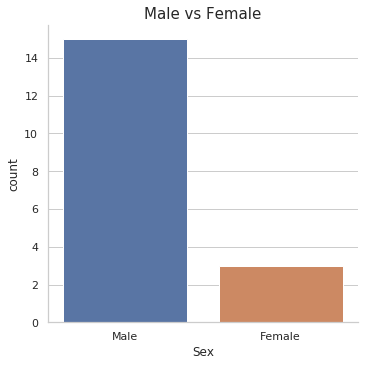

In [50]:
sb.catplot(x='Sex', kind='count', data=new_df)
plot.title('Male vs Female',fontsize=15, type)
plot.show()

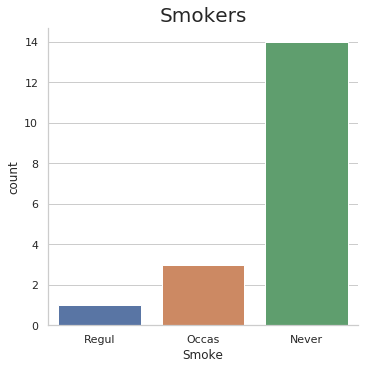

In [54]:
sb.catplot(x='Smoke', kind='count', data=new_df, order=['Regul', 'Occas', 'Never'])
plt.title('Smokers', fontsize=20)
plt.show()

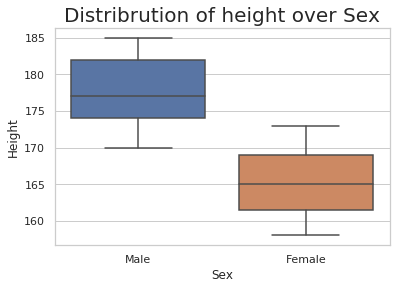

In [55]:
sb.boxplot(x='Sex',y='Height', data=new_df)
plt.title('Distribrution of height over Sex', fontsize=20)
plt.show()

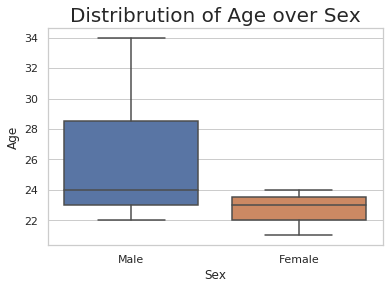

In [56]:
sb.boxplot(x='Sex',y='Age', data=new_df)
plt.title('Distribrution of Age over Sex', fontsize=20)
plt.show()